In [70]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import cmcrameri.cm as cmcm
from scipy.io import readsav
from matplotlib import ticker
import juanfit
from juanfit import SpectrumFitSingle
from brokenaxes import brokenaxes
import pandas as pd
from matplotlib import ticker

In [2]:
eis_sav = readsav("../sav/eis_merge/lvl1_offset_ech_eis_l1_20070331_113427.sav",verbose=True)

--------------------------------------------------
Date: Tue Apr  5 15:17:35 2022
User: yjzhu
Host: 0587447917.wireless.umich.net
--------------------------------------------------
Format: 11
Architecture: x86_64
Operating System: darwin
IDL Version: 8.2
--------------------------------------------------
Successfully read 15 records of which:
 - 1 are of type TIMESTAMP
 - 12 are of type VARIABLE
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - wvl [<class 'numpy.ndarray'>]
 - new_data_offset [<class 'numpy.ndarray'>]
 - new_err_offset [<class 'numpy.ndarray'>]
 - window_start_index [<class 'numpy.ndarray'>]
 - window_end_index [<class 'numpy.ndarray'>]
 - xcen [<class 'numpy.float32'>]
 - ycen [<class 'numpy.float32'>]
 - fovx [<class 'numpy.float32'>]
 - fovy [<class 'numpy.float32'>]
 - xpos [<class 'numpy.ndarray'>]
 - ypos [<class 'numpy.ndarray'>]
 - y_jitter [<class 'numpy.ndarray'>]
----------------------------------------------

In [3]:
eis_data = eis_sav["new_data_offset"]
eis_err = eis_sav["new_err_offset"]
eis_wvl = eis_sav["wvl"]

In [12]:
sample_spec_1d = np.average(eis_data[:,80:100,:],axis=(0,1))
sample_spec_1d_mask = np.copy(sample_spec_1d)
sample_spec_1d_mask[sample_spec_1d_mask < 0] = 0

In [61]:
eit_195_Aeff_list = pd.read_fwf("../sav/eit_Aeff/eit_195_al1.txt",
                                skiprows=8,names=['wvl','Aeff'],widths=[10,20],encoding='utf-8',index_col=False,
                                dtype = {'':np.float64})
eit_171_Aeff_list = pd.read_fwf("../sav/eit_Aeff/eit_171_al1.txt",
                                skiprows=8,names=['wvl','Aeff'],widths=[10,20],encoding='utf-8',index_col=False,
                                dtype = {'':np.float64})
eit_284_Aeff_list = pd.read_fwf("../sav/eit_Aeff/eit_284_al1.txt",
                                skiprows=8,names=['wvl','Aeff'],widths=[10,20],encoding='utf-8',index_col=False,
                                dtype = {'':np.float64})
eit_304_Aeff_list = pd.read_fwf("../sav/eit_Aeff/eit_304_al1.txt",
                                skiprows=8,names=['wvl','Aeff'],widths=[10,20],encoding='utf-8',index_col=False,
                                dtype = {'':np.float64})

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


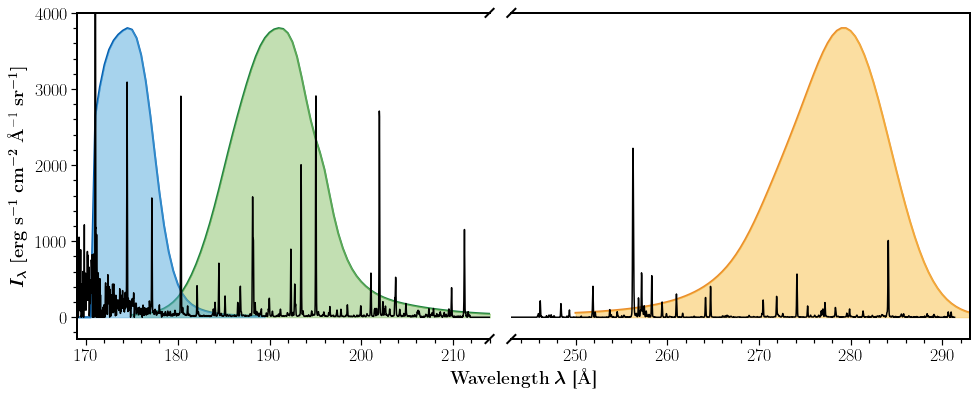

In [103]:
fig = plt.figure(figsize=(16,6),constrained_layout=True)
bax = brokenaxes(xlims=((169, 214), (243, 293)), wspace=.05,despine=False,d=0.005)
bax.plot(eis_wvl,sample_spec_1d_mask,color="black")
bax.set_ylim(top=4000)
bax_ylim = bax.get_ylim()
bax.plot(eit_195_Aeff_list["wvl"],eit_195_Aeff_list["Aeff"]/eit_195_Aeff_list["Aeff"].max()*bax_ylim[0][1]*0.95,
zorder=0,color="#1B813E",lw=2)
bax.fill_between(eit_195_Aeff_list["wvl"],0,
eit_195_Aeff_list["Aeff"]/eit_195_Aeff_list["Aeff"].max()*bax_ylim[0][1]*0.95,
color="#86C166",alpha=0.5)
bax.plot(eit_171_Aeff_list["wvl"],eit_171_Aeff_list["Aeff"]/eit_171_Aeff_list["Aeff"].max()*bax_ylim[0][1]*0.95,
zorder=0,color="#005CAF",lw=2)
bax.fill_between(eit_171_Aeff_list["wvl"],0,
eit_171_Aeff_list["Aeff"]/eit_171_Aeff_list["Aeff"].max()*bax_ylim[0][1]*0.95,
color="#51A8DD",alpha=0.5)
bax.plot(eit_284_Aeff_list["wvl"],eit_284_Aeff_list["Aeff"]/eit_284_Aeff_list["Aeff"].max()*bax_ylim[0][1]*0.95,
zorder=0,color="#E98B2A",lw=2)
bax.fill_between(eit_284_Aeff_list["wvl"],0,
eit_284_Aeff_list["Aeff"]/eit_284_Aeff_list["Aeff"].max()*bax_ylim[0][1]*0.95,
color="#F9BF45",alpha=0.5)
bax.tick_params(labelsize=18)
bax.tick_params(which="major",length=6,width=1.2)
bax.tick_params(which="minor",length=4,width=1.2)
bax.set_yticks([0,1000,2000,3000,4000])
bax.axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
bax.axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
bax.axs[1].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
bax.set_xlabel(r"\textbf{Wavelength} $\boldsymbol{\lambda}$ \textbf{[\mbox{\AA}]}",fontsize=18,labelpad=30)
bax.set_ylabel(r"$\boldsymbol{I_\lambda\ \mathrm{[erg\ s^{-1}\ cm^{-2}}}$ \textbf{\mbox{\AA}}$^{-1}\ \boldsymbol{\rm sr^{-1}]}$",fontsize=18,labelpad=50)
plt.savefig(fname="../figs/eit_summary/eis_eit_Aeff.png",format="png",dpi=300,transparent=False)
plt.savefig(fname="../figs/eit_summary/eis_eit_Aeff.pdf",format="pdf")
#ax.set_xlim(170,180)


In [50]:
eit_195_Aeff_list["Aeff"]

0     2.750500e-14
1     3.098900e-14
2     3.561100e-14
3     4.183400e-14
4     5.045600e-14
          ...     
75    4.984900e-14
76    4.663600e-14
77    4.372700e-14
78    4.108500e-14
79    3.867900e-14
Name: Aeff, Length: 80, dtype: float64